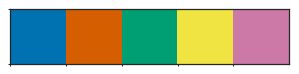

In [1]:
import itertools as it
from collections import Counter
import zlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib_venn as vn
from matplotlib_venn._common import mix_colors
import seaborn as sns
from scipy import stats
from umap import UMAP

sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=2, style=style)
pal = sns.color_palette(['#0072b2', '#d55e00', '#009e73', '#f0e442', '#cc79a7'])
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

In [ ]:
%%bash
source activate cgat_python2
g4predict intra -tmin 3 -tmax 3 -lmin 1 -lmax 12 -s \
  -f /home/matthew/iceberg_shared/General/mirror/genomes/faidx/hg19.fa \
  -b ./data/quadparser_g4s.bed

In [23]:
%%bash
source activate cgat_python2
g4predict intra -tmin 3 -tmax 3 -lmin 1 -lmax 12 -s \
  -f /home/matthew/iceberg_shared/General/mirror/genomes/faidx/mm10.fa \
  -b ./data/mm10_quadparser_g4s.bed

INFO:root:Output from G4Predict
INFO:root:Parsing command line arguments
INFO:root:Running in mode: intra
INFO:root:Parameters:
{       'bed': './data/mm10_quadparser_g4s.bed',
        'fasta': '/home/matthew/iceberg_shared/General/mirror/genomes/faidx/mm10.fa',
        'filter_overlapping': False,
        'func': <function intra at 0x7f0c29ce8c80>,
        'merge_overlapping': False,
        'write_bed12': False,
        'write_bed6': True}
INFO:root:G4 Parameters: 
{       'bulge_kwargs': {       'bulges_allowed': 0, 'start': 1, 'stop': 5},
        'inter_kwargs': {       'start': 2, 'stop': 3},
        'loop_kwargs_list': [       {       'allow_G': 1, 'start': 1, 'stop': 12},
                                    {       'allow_G': 1, 'start': 1, 'stop': 12},
                                    {       'allow_G': 1, 'start': 1, 'stop': 12}],
        'score_kwargs': {       'bulge_pen_factor': 5,
                                'loop_pen_factor': 1.5,
                                't

In [11]:
%%bash
source activate cgat_python2
grep "3t0b3,3,3l" ./data/quadparser_g4s.bed | \
bedtools getfasta -s -tab \
  -fi /home/matthew/iceberg_shared/General/mirror/genomes/faidx/hg19.fa \
  -fo stdout \
  -bed stdin | \
cut -f2 | tr '[a-z]' '[A-Z]' | sort | uniq > "./data/hg19_unique_3,3,3l_g4s.txt"
wc -l "./data/hg19_unique_3,3,3l_g4s.txt"

3748 ./data/hg19_unique_3,3,3l_g4s.txt


In [12]:
3748 / 4 ** 9

0.0142974853515625

In [13]:
%%bash
source activate cgat_python2
grep "3t0b3,3,3l" ./data/mm10_quadparser_g4s.bed | \
bedtools getfasta -s -tab \
  -fi /home/matthew/iceberg_shared/General/mirror/genomes/faidx/mm10.fa \
  -fo stdout \
  -bed stdin | \
cut -f2 | tr '[a-z]' '[A-Z]' | sort | uniq > "./data/mm10_unique_3,3,3l_g4s.txt"
wc -l "./data/mm10_unique_3,3,3l_g4s.txt"

4330 ./data/mm10_unique_3,3,3l_g4s.txt


In [335]:
4330 / 4 ** 9

0.01651763916015625

In [14]:
!head ./data/hg19_unique_3,3,3l_g4s.txt

GGGAAAGGGAAAGGGAAAGGG
GGGAAAGGGAAAGGGAAGGGG
GGGAAAGGGAAAGGGAATGGG
GGGAAAGGGAAAGGGACAGGG
GGGAAAGGGAAAGGGAGAGGG
GGGAAAGGGAAAGGGAGGGGG
GGGAAAGGGAAAGGGATAGGG
GGGAAAGGGAAAGGGCAAGGG
GGGAAAGGGAAAGGGGAAGGG
GGGAAAGGGAAAGGGGGAGGG


In [15]:
!head ./data/mm10_unique_3,3,3l_g4s.txt

GGGAAAGGGAAAGGGAAAGGG
GGGAAAGGGAAAGGGAACGGG
GGGAAAGGGAAAGGGAAGGGG
GGGAAAGGGAAAGGGAATGGG
GGGAAAGGGAAAGGGACAGGG
GGGAAAGGGAAAGGGAGAGGG
GGGAAAGGGAAAGGGAGGGGG
GGGAAAGGGAAAGGGAGTGGG
GGGAAAGGGAAAGGGATAGGG
GGGAAAGGGAAAGGGCAAGGG


In [2]:
def dinucleotide_complexity(seq):
    return len(set([seq[i:i + 2] for i in range(len(seq) - 1)]))

In [3]:
t = str.maketrans({'A': '0', 'C': '1', 'G': '2', 'T': '4'})
hg19_3l_g4s = []
hg19_complexity = []
with open('./data/hg19_unique_3,3,3l_g4s.txt') as f:
    for i, loops in enumerate(f):
        loops = loops.strip()
        loops_n = np.fromstring(loops, dtype=np.uint8)
        hg19_3l_g4s.append(loops_n)
        hg19_complexity.append(dinucleotide_complexity(loops))
hg19_3l_g4s = np.array(hg19_3l_g4s)
hg19_3l_g4s_str = [g.tostring() for g in hg19_3l_g4s]
hg19_3l_g4s_strset = set(hg19_3l_g4s_str)

In [4]:
mm10_3l_g4s = []
mm10_complexity = []
with open('./data/mm10_unique_3,3,3l_g4s.txt') as f:
    for i, loops in enumerate(f):
        loops = loops.strip()
        loops_n = np.fromstring(loops, dtype=np.uint8)
        mm10_3l_g4s.append(loops_n)
        mm10_complexity.append(dinucleotide_complexity(loops))
mm10_3l_g4s = np.array(mm10_3l_g4s)
mm10_3l_g4s_str = [g.tostring() for g in mm10_3l_g4s]
mm10_3l_g4s_strset = set(mm10_3l_g4s_str)

In [5]:
all_3l_g4s_iter = it.product(np.fromstring('ACGT', dtype=np.uint8).tolist(), repeat=9)
all_3l_g4s = np.empty(shape=(4 ** 9, 21), dtype=np.uint8)
all_3l_g4s[:] = 71
for i, g in enumerate(all_3l_g4s_iter):
    all_3l_g4s[i, [3, 4, 5, 9, 10, 11, 15, 16, 17]] = g
all_3l_g4s_str = [g.tostring() for g in all_3l_g4s]
all_complexity = [dinucleotide_complexity(x.decode('utf-8')) for x in all_3l_g4s_str]
all_3l_g4s_strset = set(all_3l_g4s_str)
in_hg19 = np.ascontiguousarray([g in hg19_3l_g4s_strset for g in all_3l_g4s_str])
in_mm10 = np.ascontiguousarray([g in mm10_3l_g4s_strset for g in all_3l_g4s_str])
in_both = in_hg19 & in_mm10

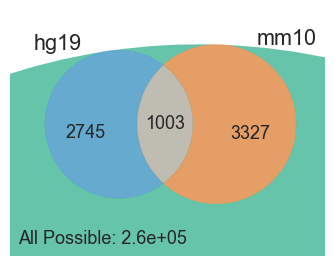

In [6]:
sns.set(font_scale=1.5, style=style)
fig, ax = plt.subplots(figsize=(5, 5))
venn = vn.venn3([hg19_3l_g4s_strset, mm10_3l_g4s_strset, all_3l_g4s_strset],
                set_labels=['hg19', 'mm10', ''],
                normalize_to=10,
                set_colors=pal[:3],
                alpha=0.6)
venn.subset_labels[venn.id2idx['001']].set_text('')
venn.patches[venn.id2idx['101']].set_color(pal[0])
venn.patches[venn.id2idx['011']].set_color(pal[1])
venn.patches[venn.id2idx['111']].set_color(mix_colors(*np.asarray(pal[:2])))
x_centers, y_centers = np.asarray([venn.get_circle_center(i) for i in [0, 1]]).T
x_radii, y_radii = np.asarray([venn.get_circle_radius(i) for i in [0, 1]]).T
xlim = [(x_centers - x_radii).min(), (x_centers + x_radii).max()]
ylim = [(y_centers - y_radii).min(), (y_centers + y_radii).max()]
ax.set(xlim=xlim + np.array([-0.1, 0.1]), ylim=ylim  + np.array([-0.15, 0.1]))
ax.annotate(s='All Possible: {:2.1e}'.format(len(all_3l_g4s_strset)),
            xy=(0.025, 0.05),
            xycoords='axes fraction')
plt.tight_layout()
plt.savefig('./figures/quadparser_3l_overlap_venn.svg')
plt.show()
sns.set(font_scale=2, style=style)

In [7]:
1003 / (1003 + 2745)

0.2676093916755603

In [9]:
p_val = stats.hypergeom.sf(
    len(mm10_3l_g4s_strset.intersection(hg19_3l_g4s_strset)) - 1,
    len(all_3l_g4s_strset),
    len(mm10_3l_g4s_strset),
    len(hg19_3l_g4s_strset)
)
if p_val == 0:
    f = np.finfo(np.float64)
    print('p < {:2.1e}'.format(f.tiny))

p < 2.2e-308


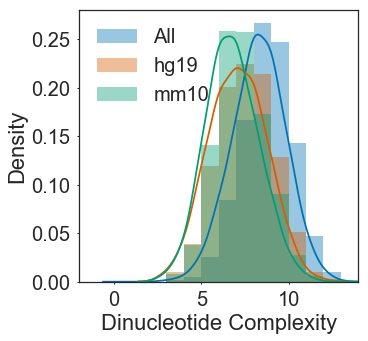

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
kde_kws = {'bw': 0.55}
sns.distplot(all_complexity, bins=np.arange(15), label='All', color=pal[0], kde_kws=kde_kws)
sns.distplot(hg19_complexity, bins=np.arange(15), label='hg19', color=pal[1], kde_kws=kde_kws)
sns.distplot(mm10_complexity, bins=np.arange(15), label='mm10', color=pal[2], kde_kws=kde_kws)
ax.set_xlim(-2, 14)
ax.set(xlabel='Dinucleotide Complexity', ylabel='Density')
plt.legend(loc=0)
plt.savefig('./figures/dinucleotide_complexity.svg')
plt.show()

In [11]:
idx = np.random.choice(np.arange(len(all_3l_g4s)), size=50000, replace=False)
g4_comp = UMAP(n_neighbors=25, min_dist=0.25, metric='hamming').fit_transform(all_3l_g4s[idx])

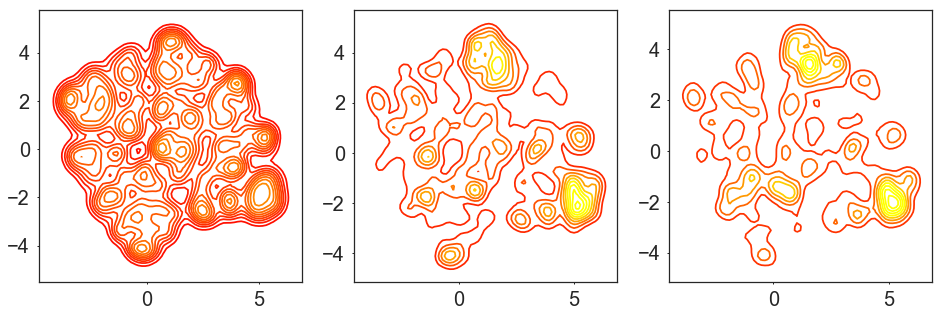

In [13]:
fig, axes = plt.subplots(figsize=(16, 5), ncols=3)
kde_kws = dict(shade=False, bw=0.25,
               gridsize=75, n_levels=10,
               cmap='autumn',
               vmin=0, vmax=0.05)
sns.kdeplot(*g4_comp.T, ax=axes[0], **kde_kws)
sns.kdeplot(*g4_comp[in_hg19[idx]].T, ax=axes[1], **kde_kws)
sns.kdeplot(*g4_comp[in_mm10[idx]].T, ax=axes[2], **kde_kws)
plt.savefig('./figures/umap_g4s.svg')
plt.show()

In [341]:
%%bash
source activate cgat_python2
grep "3t0b3,3,3l" ./data/quadparser_g4s.bed | \
bedtools slop -b 25 -g ./data/hg19.chrom.sizes -i stdin | \
bedtools getfasta -s -tab \
  -fi /home/matthew/iceberg_shared/General/mirror/genomes/faidx/hg19.fa \
  -fo stdout \
  -bed stdin | \
cut -f2 | tr '[a-z]' '[A-Z]' | sort > "./data/hg19_3,3,3l_g4s_with_flank.txt"
wc -l "./data/hg19_3,3,3l_g4s_with_flank.txt"

12361 ./data/hg19_3,3,3l_g4s_with_flank.txt


In [343]:
%%bash
source activate cgat_python2
cut -f1-2 /home/matthew/iceberg_shared/General/mirror/genomes/faidx/mm10.fa.fai > ./data/mm10.chrom.sizes
grep "3t0b3,3,3l" ./data/mm10_quadparser_g4s.bed | \
bedtools slop -b 25 -g ./data/mm10.chrom.sizes -i stdin | \
bedtools getfasta -s -tab \
  -fi /home/matthew/iceberg_shared/General/mirror/genomes/faidx/mm10.fa \
  -fo stdout \
  -bed stdin | \
cut -f2 | tr '[a-z]' '[A-Z]' | sort > "./data/mm10_3,3,3l_g4s_with_flank.txt"
wc -l "./data/mm10_3,3,3l_g4s_with_flank.txt"

72989 ./data/mm10_3,3,3l_g4s_with_flank.txt


In [2]:
def dinucleotide_frequency(seq):
    return Counter([seq[i:i + 2] for i in range(len(seq) - 1)])

In [3]:
hg19_dinucls = []
with open('./data/hg19_3,3,3l_g4s_with_flank.txt') as f:
    for i, loops in enumerate(f):
        loops = loops.strip()
        hg19_dinucls.append(dinucleotide_frequency(loops))
hg19_dinucls = pd.DataFrame(hg19_dinucls).fillna(0)
hg19_dinucls['genome'] = 'hg19'
mm10_dinucls = []
with open('./data/mm10_3,3,3l_g4s_with_flank.txt') as f:
    for i, loops in enumerate(f):
        loops = loops.strip()
        mm10_dinucls.append(dinucleotide_frequency(loops))
mm10_dinucls = pd.DataFrame(mm10_dinucls).fillna(0)
mm10_dinucls['genome'] = 'mm10'
dinucls = pd.concat([hg19_dinucls, mm10_dinucls])
dinucls.drop([x for x in dinucls.columns if 'N' in x], axis=1, inplace=True)
dinucls.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT,genome
0,33.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,13,0.0,0.0,0.0,0.0,0.0,hg19
1,16.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,27,0.0,0.0,0.0,0.0,0.0,hg19
2,20.0,1.0,8.0,2.0,0.0,0.0,0.0,3.0,6.0,1.0,21,1.0,4.0,1.0,0.0,2.0,hg19
3,17.0,0.0,13.0,0.0,1.0,1.0,0.0,1.0,10.0,1.0,18,3.0,1.0,2.0,1.0,1.0,hg19
4,14.0,1.0,11.0,0.0,0.0,0.0,1.0,0.0,11.0,0.0,32,0.0,0.0,0.0,0.0,0.0,hg19


In [4]:
from sklearn.decomposition import PCA

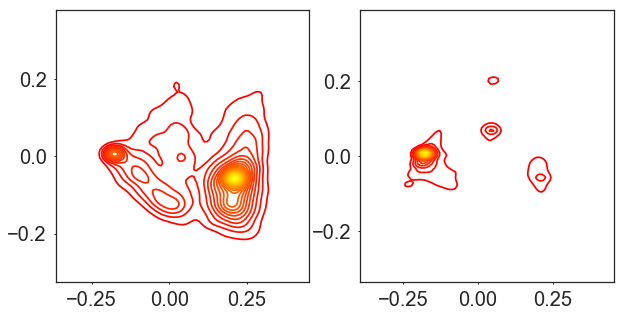

In [33]:
d = dinucls._get_numeric_data().T / dinucls._get_numeric_data().sum(1)
comps = PCA(n_components=2).fit_transform(d.T)
fig, ax = plt.subplots(figsize=(10, 5), ncols=2)
sns.kdeplot(comps[:, 0][dinucls.genome == 'hg19'],
            comps[:, 1][dinucls.genome == 'hg19'],
            gridsize=100,
            shade=False,
            n_levels=25,
            ax=ax[0],
            cmap='autumn')
sns.kdeplot(comps[:, 0][dinucls.genome == 'mm10'],
            comps[:, 1][dinucls.genome == 'mm10'],
            gridsize=100,
            shade=False,
            n_levels=25,
            ax=ax[1],
            cmap='autumn')
plt.show()